## Convolutional Neural Network (CNN)

- Convolutional Neural Networks (CNNs) are a class of deep neural networks designed for processing and analyzing visual data, such as images and videos.
-CNNs have proven to be highly effective in tasks like image recognition, object detection, and image classification.


### Workflow:

1. **Convolution:**
   - Convolutional layers extract features from the input images by applying convolutional operations with learnable filters.

2. **Activation:**
   - Activation functions introduce non-linearities to the network, enabling it to learn complex mappings between the input and output.

3. **Pooling:**
   - Pooling layers reduce the spatial dimensions of the feature maps, focusing on the most important information.

4. **Flattening:**
   - The output from the convolutional and pooling layers is flattened into a one-dimensional vector to be fed into fully connected layers.

5. **Fully Connected Layers:**
   - Fully connected layers process the high-level features and produce the final output, often used for classification.


### Applications:

- **Image Classification:**
  - Identifying and categorizing objects within images.

- **Object Detection:**
  - Locating and classifying objects within an image.

- **Image Generation:**
  - Generating new images based on learned patterns.

CNNs have revolutionized computer vision tasks and are a fundamental architecture in many state-of-the-art models.


## Importing Necessary Libraries

In [1]:
import os
import cv2
import json
import gdown
import numpy as np
import matplotlib.pyplot as plt

## Downloading the datasets from google drive

In [3]:
!gdown https://drive.google.com/uc?id=11peRlF08drZrOABaIJTBZAEtWi9Hykto

Downloading...
From: https://drive.google.com/uc?id=11peRlF08drZrOABaIJTBZAEtWi9Hykto
To: /content/archive.zip
100% 26.9M/26.9M [00:00<00:00, 94.7MB/s]


## Extracting the images file

In [5]:
## write your code here
from zipfile import ZipFile
archive = ZipFile('archive.zip')
archive.extractall("/content/data")

## Provide path to datasets, training data, validation data and testing data

In [6]:
## write your code here
data_path = os.path.join(os.getcwd(), 'data')
train_path = os.path.join(os.getcwd(), 'data', 'train')
valid_path = os.path.join(os.getcwd(), 'data', 'validation')
test_path = os.path.join(os.getcwd(), 'data', 'test')

## Provide the name of labels

In [8]:
## write your code here
labels = ["adidas", "nike"]

## Exploring Datasets

- Find out the statistics of the datasets


In [9]:
## write your code here
for split in os.listdir(data_path):
  if split != 'labelnames.csv':
    path_to_split_type = os.path.join(data_path,split)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      print("There are {} {} image belonging to {} class.".format(len(os.listdir(path_to_category)),split,category))

There are 27 validation image belonging to adidas class.
There are 28 validation image belonging to nike class.
There are 30 test image belonging to adidas class.
There are 30 test image belonging to nike class.
There are 230 train image belonging to adidas class.
There are 230 train image belonging to nike class.


**<h1>Datasets Visualization </h1>**

In [10]:
## write a function to extract the images path when provided with data_dir
def get_images(data_dir,number_of_samples):
  image_path = []
  for label in labels:
    path = os.path.join(data_dir,label)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [11]:
## write a function to visualize the dataset
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
  plt.show()

## Visualize Training Images

In [12]:
## write your code here
train_images_path = get_images(data_dir = train_path,
                               number_of_samples = 5)
print(train_images_path)

['/content/data/train/adidas/aadidas_ (23).jpg', '/content/data/train/adidas/adidas_ (116).jpg', '/content/data/train/adidas/Adidas (31).jpg', '/content/data/train/adidas/adidas_ (114).jpg', '/content/data/train/adidas/adidas_ (135).jpg', '/content/data/train/nike/Image_155.jpg', '/content/data/train/nike/Image_195.jpg', '/content/data/train/nike/Image_235.jpg', '/content/data/train/nike/Image_111.jpg', '/content/data/train/nike/Image_123.jpg']


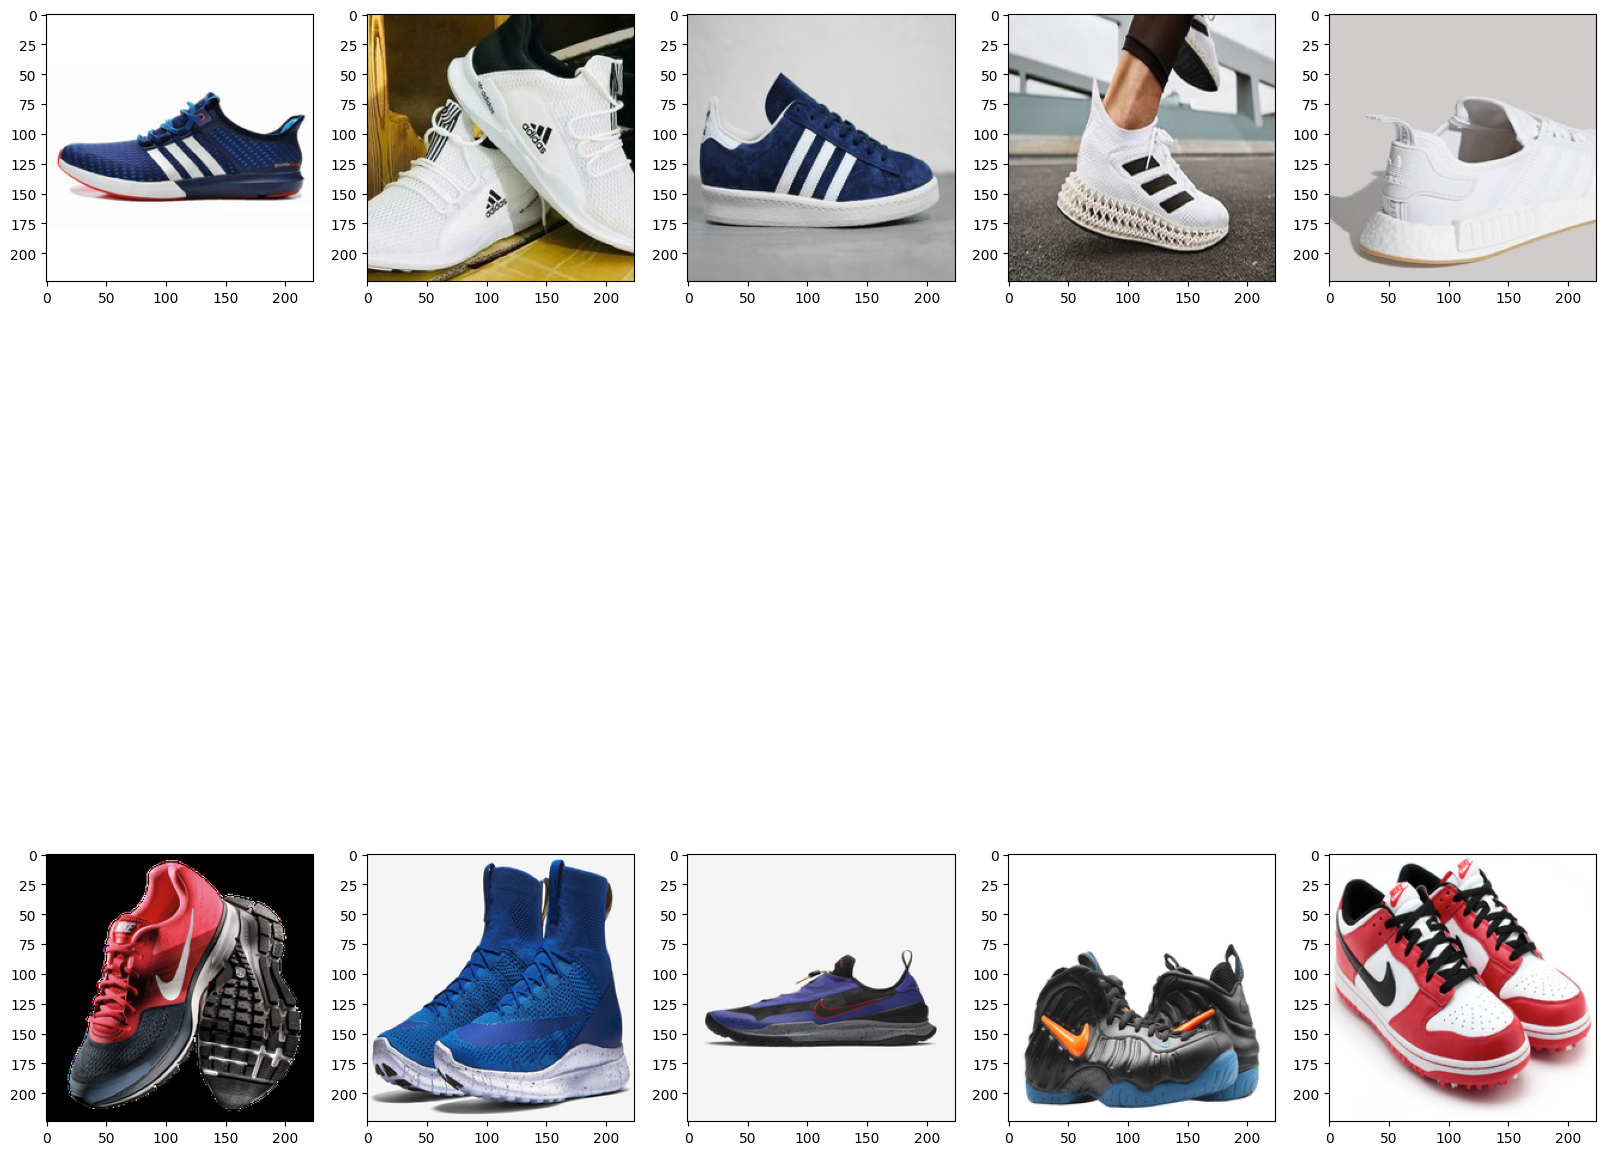

In [13]:
## write your code here

visualize_dataset(image_path = train_images_path,
                  rows = 2,
                  cols = 5)

## Visualizing Validation Images

In [14]:
## write your code here
validation_images_path = get_images(data_dir = valid_path,
                               number_of_samples = 5)
print(validation_images_path)

['/content/data/validation/adidas/adidass_(21).jpg', '/content/data/validation/adidas/adidass_(15).jpg', '/content/data/validation/adidas/adidass_(18).jpg', '/content/data/validation/adidas/adidas_ (152).jpg', '/content/data/validation/adidas/adidass_(30).jpg', '/content/data/validation/nike/Image_264.jpg', '/content/data/validation/nike/Image_269.jpg', '/content/data/validation/nike/Image_291.jpg', '/content/data/validation/nike/Image_289.jpg', '/content/data/validation/nike/Image_300.jpg']


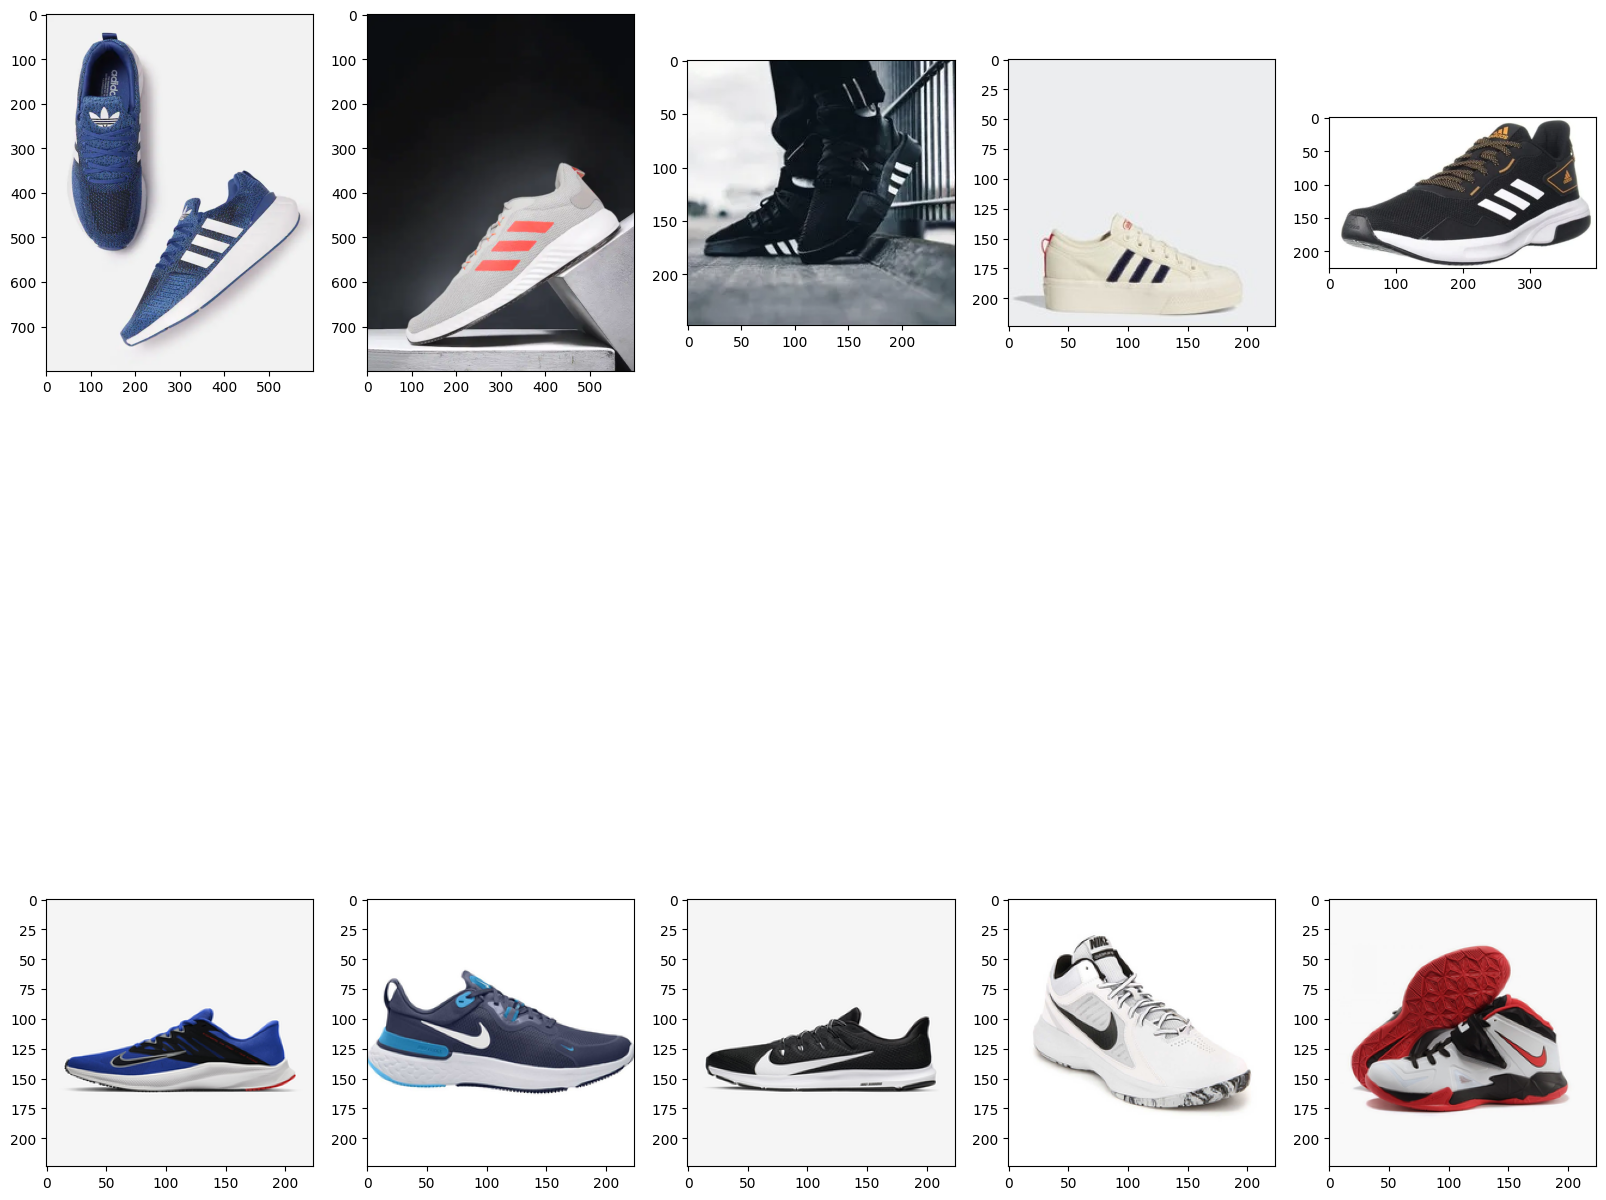

In [15]:
## write your code here
visualize_dataset(image_path = validation_images_path,
                  rows = 2,
                  cols = 5)

## Visualizing Testing Images

In [16]:
## write your code here
test_images_path = get_images(data_dir = test_path,
                               number_of_samples = 5)
print(test_images_path)

['/content/data/test/adidas/Adidas (21).JPG', '/content/data/test/adidas/Adidas (27).jpg', '/content/data/test/adidas/aadidas_ (14).jpg', '/content/data/test/adidas/Adidas (25).jpg', '/content/data/test/adidas/Adidas (19).jpg', '/content/data/test/nike/Image_240.jpg', '/content/data/test/nike/Image_190.jpg', '/content/data/test/nike/Image_80.jpg', '/content/data/test/nike/Image_259.jpg', '/content/data/test/nike/Image_120.jpg']


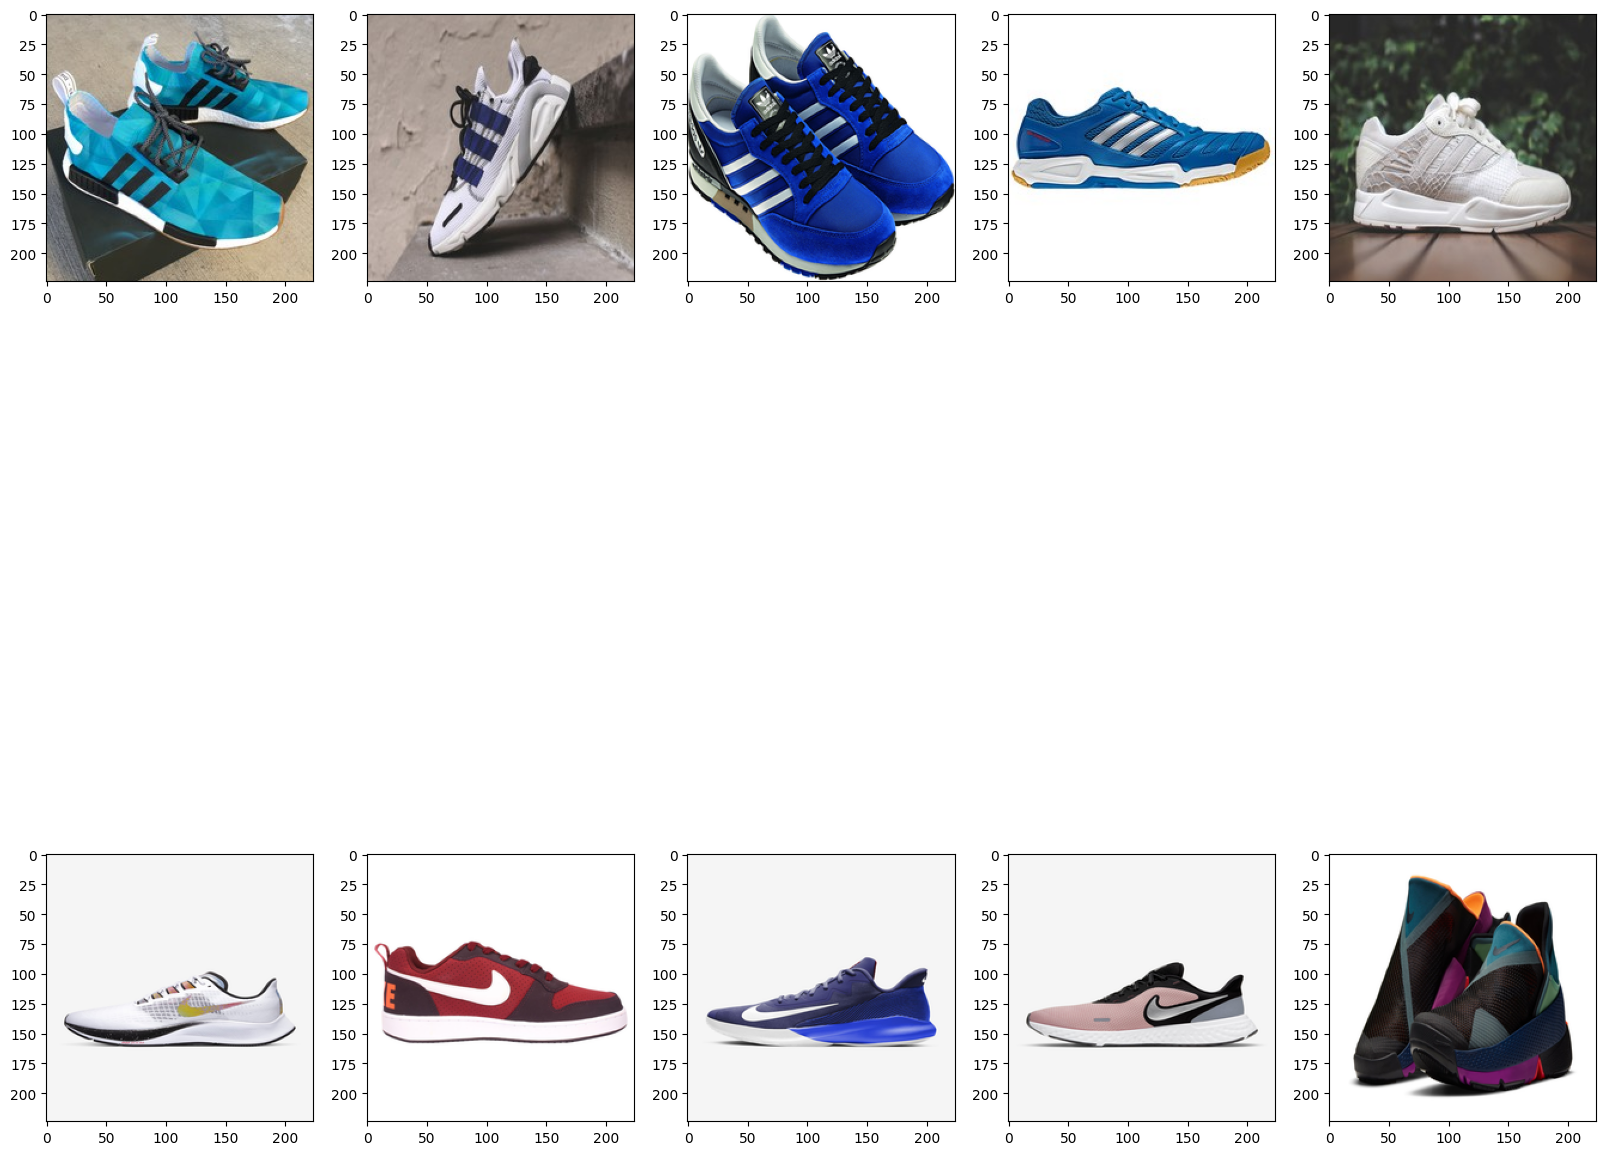

In [17]:
## write your code here
visualize_dataset(image_path = test_images_path,
                  rows = 2,
                  cols = 5)

<h1>Model Building & Preparation</h1>

In [18]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50, Xception
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image


## Data Augmentation in Image Processing

- Data augmentation is a technique commonly used in machine learning, particularly in the training of deep learning models on image data.
- The goal of data augmentation is to artificially increase the size of the training dataset by applying various transformations to the existing images. This helps improve the model's generalization, robustness, and performance.

### Key Transformations:

1. **Rotation:**
   - Images are rotated by a certain degree (e.g., random rotation between 0 and 360 degrees).

2. **Flip:**
   - Horizontal and vertical flipping of images, which helps the model learn from different perspectives.

3. **Zoom:**
   - Randomly zooming in or out of images to teach the model to recognize objects at various scales.

4. **Shift:**
   - Shifting images horizontally and vertically to create variations in object positions.

5. **Brightness and Contrast Adjustment:**
   - Randomly adjusting the brightness and contrast of images to simulate different lighting conditions.


### Benefits of Data Augmentation:

- **Increased Diversity:**
  - Data augmentation introduces diversity into the training set, helping the model generalize better to unseen data.

- **Improved Robustness:**
  - The model becomes more robust to variations in lighting, orientation, and other factors present in real-world scenarios.

- **Reduced Overfitting:**
  - Augmenting the data helps prevent overfitting by exposing the model to a wider range of examples.


In [19]:
## write your code here
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=(0.8,1.2),
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.25,
                                   zoom_range=0.5,
                                   rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
## write your code here for training generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    shuffle=True)

Found 460 images belonging to 2 classes.


In [21]:
## write your code here for training generator
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=32)

Found 55 images belonging to 2 classes.


## Transfer Learning

- Transfer learning is a technique in machine learning where a pre-trained model on one task is adapted for a different but related task.
- Instead of training a model from scratch for a new task, transfer learning leverages the knowledge gained from solving one problem to improve performance on a different, yet related, problem.

### Key Concepts:

1. **Pre-trained Model:**
   - Transfer learning starts with a pre-trained model that has been trained on a large dataset for a specific task, often in a domain like image classification, natural language processing, or speech recognition.
   
2. **Feature Extraction:**
   - The knowledge gained by the pre-trained model is retained in the form of learned features.
   - In early layers of the model, lower-level features like edges and textures are learned.

3. **Fine-tuning:**
   - The pre-trained model is then fine-tuned on the new task or dataset. This involves training the model on the new data while adjusting the weights of some layers to adapt to the specifics of the new task.

### Advantages:

- **Reduced Training Time:**
  - Transfer learning can significantly reduce the time and computational resources needed for training a model from scratch, especially when dealing with limited data for the new task.

- **Improved Performance:**
  - Leveraging the knowledge from a pre-trained model often leads to better generalization and performance on the new task, especially when the tasks are related.

- **Effective in Low Data Scenarios:**
  - Transfer learning is particularly useful when the new task has a small dataset, as the pre-trained model brings in knowledge from a larger dataset.

### Use Cases:

- **Image Classification:**
  - Pre-trained models on large image datasets (e.g., ImageNet) can be fine-tuned for specific image classification tasks.

- **Natural Language Processing:**
  - Models pre-trained on extensive text corpora can be fine-tuned for sentiment analysis, named entity recognition, or other NLP tasks.

- **Object Detection:**
  - Pre-trained models for object detection can be adapted to detect specific objects in new datasets.

- Transfer learning has become a key technique in many machine learning applications, allowing practitioners to achieve good results with less data and computational resources.


## VGG16


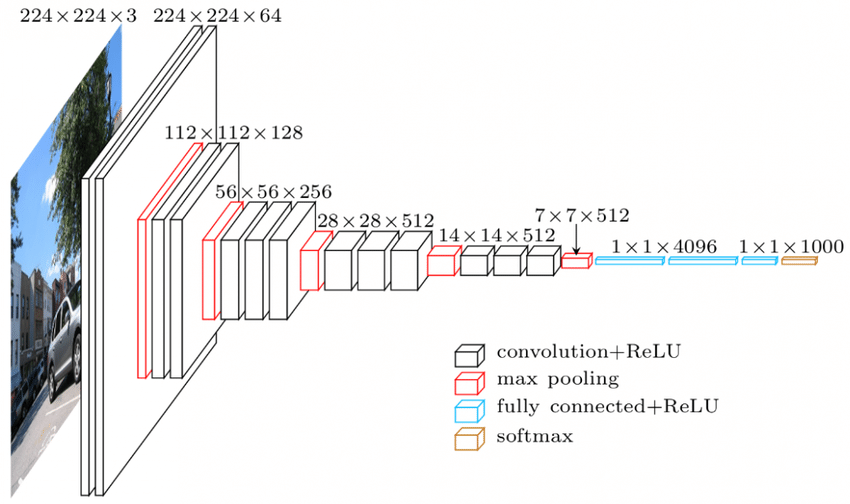


## Load Xception model

In [26]:
## write your code here
xception = Xception(weights="imagenet",
              include_top=False,
              input_shape=(224,224,3))

In [27]:
## write your code here
xception.traiable = False

In [28]:
# # Let's take a look to see how many layers are in the base models
# print("Number of layers in the base model: ", len(xception.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 140

# # # Freeze all the layers before the `fine_tune_at` layer
# for layer in xception.layers[:fine_tune_at]:
#   layer.trainable =  False

## Add a classification layer

In [29]:
## write your code here
output = Flatten()(xception.output)
output = Dropout(0.4)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [31]:
## write your code here
model = Model(inputs = xception.input,
              outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

## Adam Optimizer Parameters

- **`beta_1`:** Exponential decay rate for the first moment estimates (mean). Typically set to 0.9.
  
- **`beta_2`:** Exponential decay rate for the second moment estimates (uncentered variance). Commonly set to 0.999.

- **`epsilon`:** Small constant added to the denominator for numerical stability. Commonly on the order of 1e-7 or 1e-8.

In the Adam optimizer, these parameters influence the adaptation of model weights during training by controlling the exponential decay rates and ensuring numerical stability in the optimization process.


## Compile the model

In [32]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

## Create a new directory to store model weights

In [33]:
## write your code here
os.mkdir('/content/model_weights/')

## Checkpoint your model

In [34]:
## write your code here
model_checkpoint = ModelCheckpoint('./model_weights/shoe_brand_model_{epoch:02d}-{val_accuracy:.6f}.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

## Train the model

In [35]:
## write your code here
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 32,
    epochs = 25,
    callbacks=[model_checkpoint])

<ipython-input-35-1388c18582ee>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
 9/14 [==================>...........] - ETA: 3s - loss: 0.6849 - accuracy: 0.5970

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/14 [==============================] - ETA: 0s - loss: 0.6673 - accuracy: 0.6075
Epoch 1: val_loss improved from inf to 0.57687, saving model to ./model_weights/shoe_brand_model_01-0.750000.h5
14/14 [==============================] - 50s 923ms/step - loss: 0.6673 - accuracy: 0.6075 - val_loss: 0.5769 - val_accuracy: 0.7500
Epoch 2/25
14/14 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.7967
Epoch 2: val_loss did not improve from 0.57687
14/14 [==============================] - 9s 652ms/step - loss: 0.4772 - accuracy: 0.7967 - val_loss: 0.6268 - val_accuracy: 0.7812
Epoch 3/25
14/14 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.8715
Epoch 3: val_loss improved from 0.57687 to 0.51509, saving model to ./model_weights/shoe_brand_model_03-0.843750.h5
14/14 [==============================] - 10s 644ms/step - loss: 0.3132 - accuracy: 0.8715 - val_loss: 0.5151 - val_accuracy: 0.8438
Epoch 4/25
14/14 [==============================] - ETA: 0s

# serialize model to JSON


In [36]:
## write your code here
# serialize model to JSON
model_json = model.to_json()
with open("shoe_brand_model_xception.json", "w") as json_file:
    json_file.write(model_json)

## Learning Curve Visualization

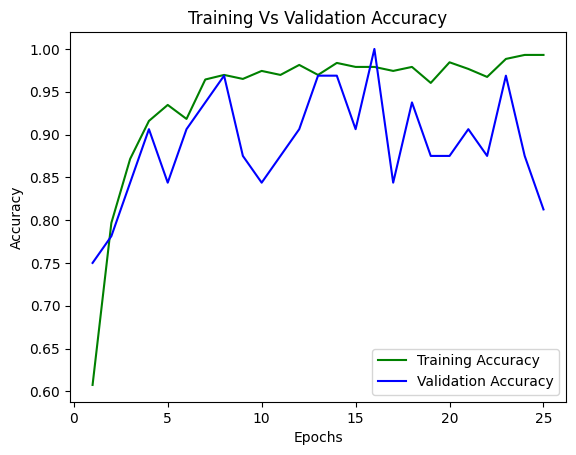

In [38]:
## write your code here
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Storing the model weights and config in a google drive

In [43]:
from google.colab import drive

In [44]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [45]:
!cp "/content/shoe_brand_model_xception.json" "/content/gdrive/MyDrive/Latin_Fellowship/shoes_classification/xception_model"
!cp "/content/model_weights/shoe_brand_model_16-1.000000.h5" "/content/gdrive/MyDrive/Latin_Fellowship/shoes_classification/xception_model"

## Inference Code

In [48]:
from tensorflow.keras.preprocessing import image

In [60]:
json_file_path = "/content/shoe_brand_model_xception.json"
weights_file_path = "/content/model_weights/shoe_brand_model_04-0.906250.h5"

In [61]:
with open(json_file_path, 'r') as json_file:
  loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_file_path)
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [90]:
def predict_image(img_path, loaded_model, labels):
  img = image.load_img(img_path, target_size = (224, 224))
  img_arr = image.img_to_array(img)
  img_arr = np.expand_dims(img_arr, axis=0)
  img_arr = img_arr/255
  prediction = loaded_model.predict(img_arr)
  if prediction < 0.5:
    prediction = 0
    final_output = labels[prediction]
  else:
    prediction = 1
    final_output = labels[prediction]
  return final_output




In [91]:
labels[0]

'adidas'

In [92]:
predict_image(img_path = "/content/data/test/nike/Image_10.jpg",
              loaded_model = loaded_model,
              labels = labels
             )

1/1 [==============================] - 0s 38ms/step


'nike'


Data Flow Diagram Of Our Web Application:

- User Upload: The user selects an image from their device and uploads it through the user interface.
- API Request: The user interface sends a POST request to the API Gateway with the image data.
- API Gateway: The API Gateway receives the request, validates it for security and format, and routes it to the FastAPI server.
- FastAPI Server:
  - Decoding: The FastAPI server securely decodes the uploaded image data.
  - Resizing: The server resizes the image to the format required by the prediction model.
  - Prediction: The resized image is fed into your trained prediction model.
  - Response Generation: The model's output (predicted class and confidence score) is formatted and packaged into a JSON response.
  - API Response: The FastAPI server sends the response back to the API Gateway.
- User Interface: The API Gateway transmits the response to the user interface.
- Result Display: The user interface displays the predicted class and any additional information (e.g., confidence score) in a clear and informative way.


In [39]:
def check_predictions(dataset_dir):
  y_true = []
  y_pred = []
  images_path = []
  for category_type in os.listdir(dataset_dir):
    path_to_category_type = os.path.join(dataset_dir,category_type)
    for img in os.listdir(path_to_category_type):
      img_arr = image.load_img(os.path.join(path_to_category_type,img),
                               target_size=(224,224))
      img_arr = image.img_to_array(img_arr)
      img_arr = np.expand_dims(img_arr,axis=0)
      img_arr = img_arr / 255.0
      prediction = model.predict(img_arr)
      if prediction > 0.5:
        prediction_class = 1
        real_class = labels.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
      else:
        prediction_class = 0
        real_class = labels.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
  return [y_true,y_pred,images_path]

In [40]:
[y_true,y_pred,images_path] = check_predictions(test_path)
print(len(y_true))
print(len(y_pred))
print(len(images_path))

1/1 [==============================] - 0s 31ms/step
60
60
60


## Visualize confusion matrix and classification report

In [41]:
## write your code here
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
## write your code here
#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=labels))

Confusion Matrix
[[23  7]
 [ 0 30]]
Classification Report
              precision    recall  f1-score   support

      adidas       1.00      0.77      0.87        30
        nike       0.81      1.00      0.90        30

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.91      0.88      0.88        60

